In [1]:
import copy
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d

from IPython.display import Image
from IPython.core.display import HTML 

from PTI.ReadDataFiles import PTIData
import PTI.Corrections as PTICorr

# Effects of Interpolation on LUT Values

In [2]:
file_excorr = np.genfromtxt('PTI/correction_data/excorr.txt',
                                skip_header = 6,
                                skip_footer = 1,
                                usecols = 1)
excorr_wavelengths = np.arange(250, 750+1)

FS_file_emcorr = np.genfromtxt('PTI/correction_data/emcorri.txt',
                                skip_header = 6,
                                skip_footer = 1,
                                usecols = 1)
IS_file_emcorr = np.genfromtxt('PTI/correction_data/emcorr-sphere-quanta.txt',
                                skip_header = 6,
                                skip_footer = 1,
                                usecols = 1)
FS_emcorr_wavelengths = np.arange(250, 850+2,2)
IS_emcorr_wavelengths = np.arange(300, 848+2,2)


interpolations = ['linear', 'slinear', 'quadratic', 'cubic']
interp_titles  = ['Linear', "Linear Spline", "Quadratic Spline", "Cubic Spline"]

In [4]:
interp_test_paths = ["Henry/Emission/PPOetoh/Sept/EmissionScan_3x14gperL_PPOinETOH_ex310_2sec_160901.txt",
                     "Henry/Emission/PPOetoh/Sept/EmissionScan_0x31gperL_PPOinETOH_ex310_2sec_160902.txt",
                     "Henry/Emission/bisMSBlab/bisMSB_LAB_0.894mgL_ex330.txt",
                     "Henry/Sphere/bisMSB_LAB/EmissionScan_LAB_ex350_1sec.txt",
                     "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex380.txt"]

interp_tests = list()
for path in interp_test_paths:
    interp_tests.append(PTIData(path))

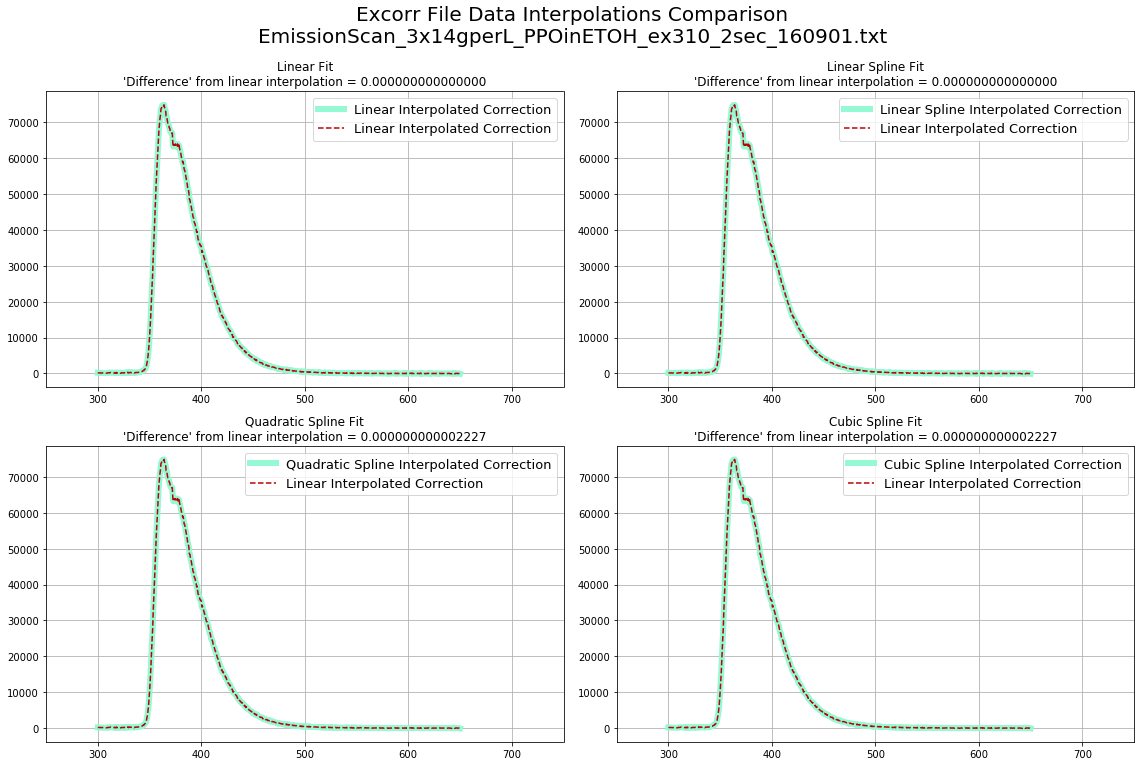

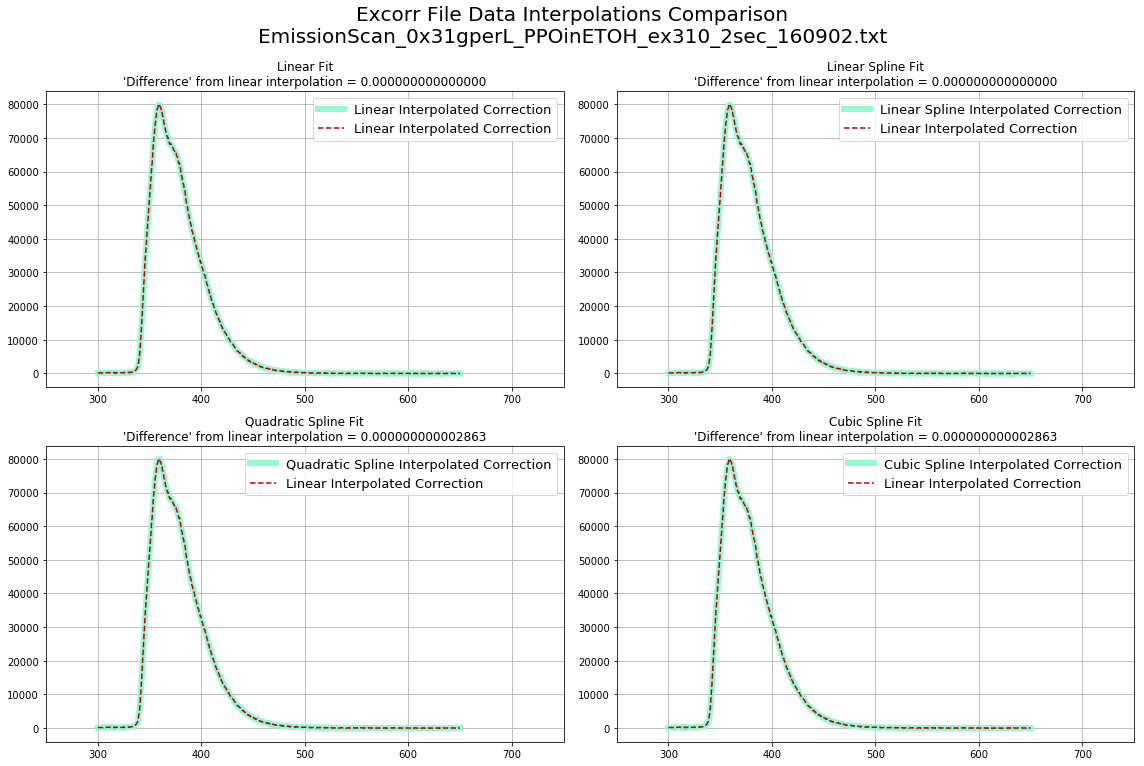

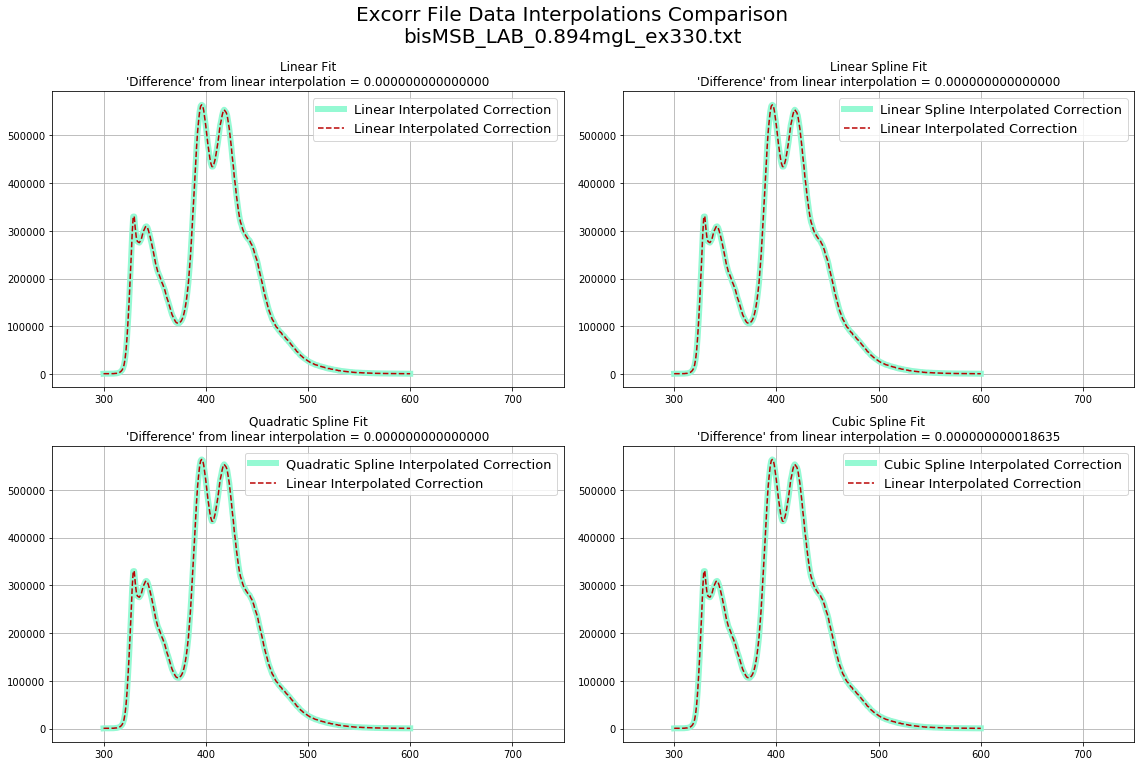

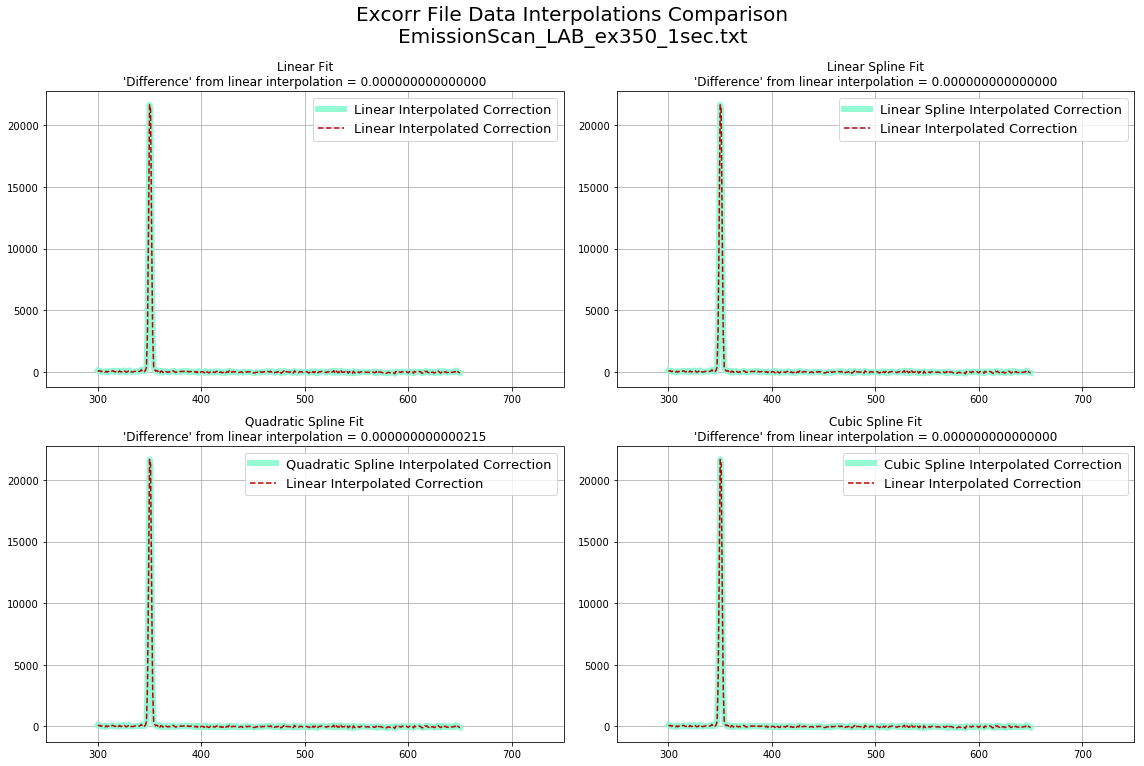

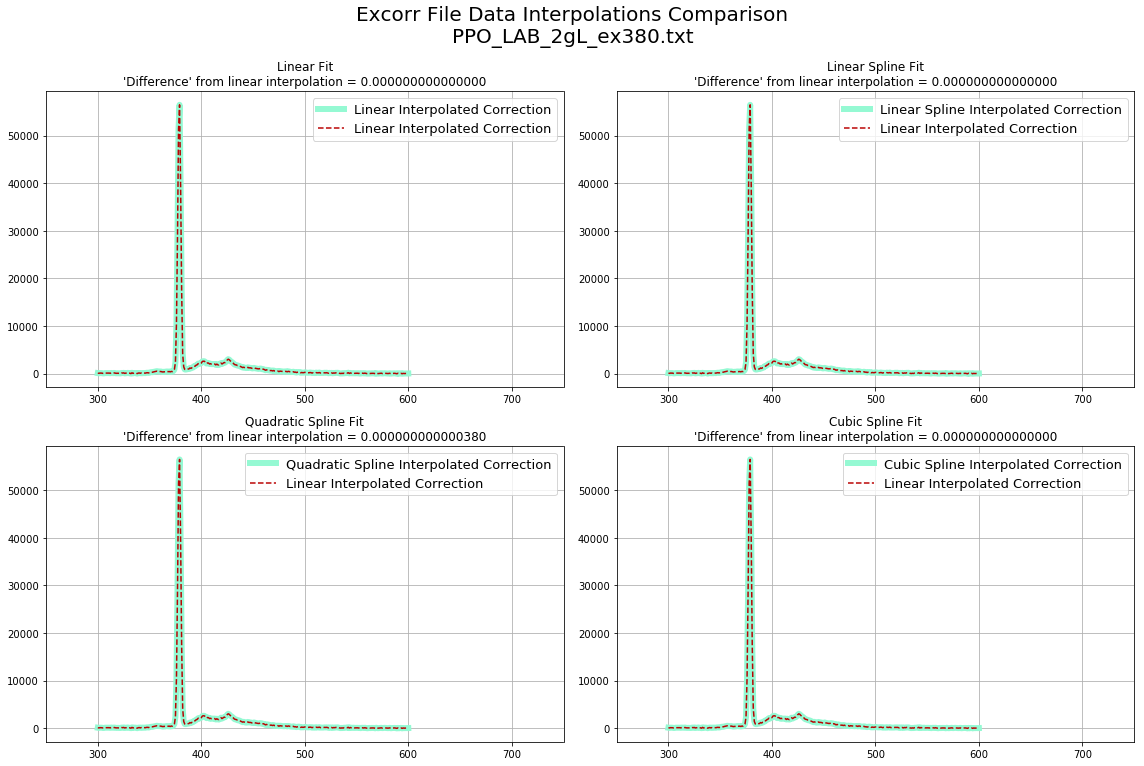

In [7]:
step  = 0.5
for data in interp_tests:
    fig = plt.figure(figsize = (16,10))
    fig.suptitle("Excorr File Data Interpolations Comparison\n"+
                 data.file_path.split('/')[-1], y = 1.06, fontsize  = 20)
    for i in range(4):
        ax = fig.add_subplot(2,2,i+1)

        corrections = PTICorr.get_corrections(data, diode = False, emcorr = False, ex_interp_method = interpolations[i])
        lin_correction = PTICorr.get_corrections(data, diode = False, emcorr = False, ex_interp_method = 'linear')
        
        corrected = np.multiply(data.raw_data, corrections)
        lin_corrected = np.multiply(data.raw_data, lin_correction)

        mean_square_diff_from_lin = np.sqrt(np.mean(np.square(np.diff(lin_corrected  - corrected))))

        ax.plot(data.wavelengths, corrected, color = "#95f9d3", ls = '-', lw = 6)
        ax.plot(data.wavelengths, lin_corrected, color = "#ba0303", ls = '--')

        ax.set_xlim([250,750])
        ax.set_title(interp_titles[i] + " Fit\n" + 
                     "'Difference' from linear interpolation = %.15f" %mean_square_diff_from_lin)
        ax.legend(["%s Interpolated Correction"%interp_titles[i], "Linear Interpolated Correction"], fontsize = 13)
        ax.grid()
#         ax.text(0.01, 0.60, ,
#                 transform=ax.transAxes,fontsize = 14)
    
    plt.tight_layout()
    plt.show()

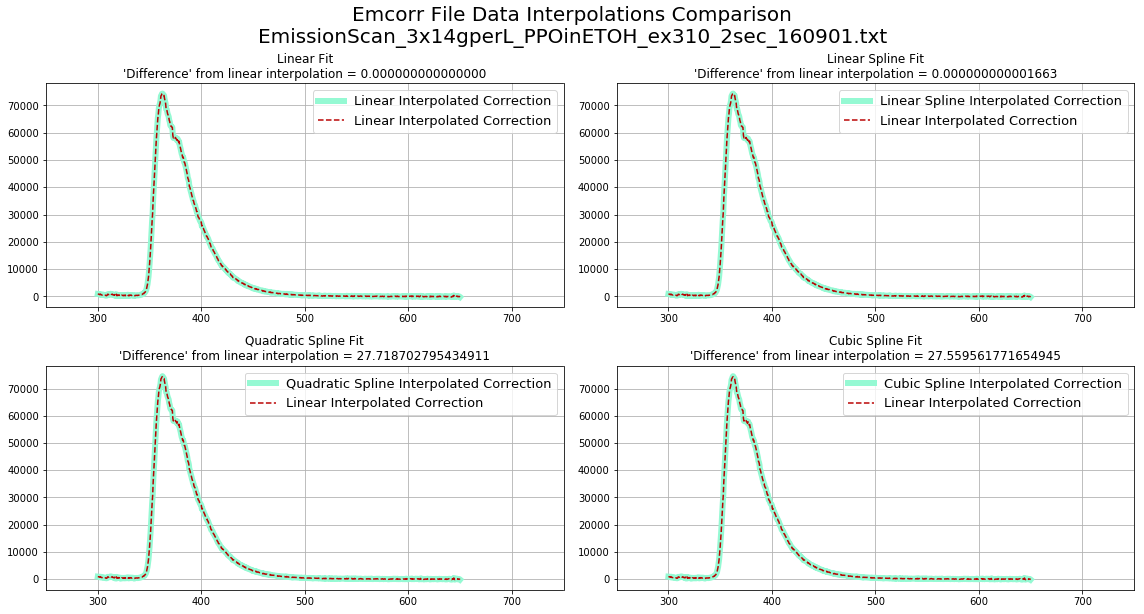

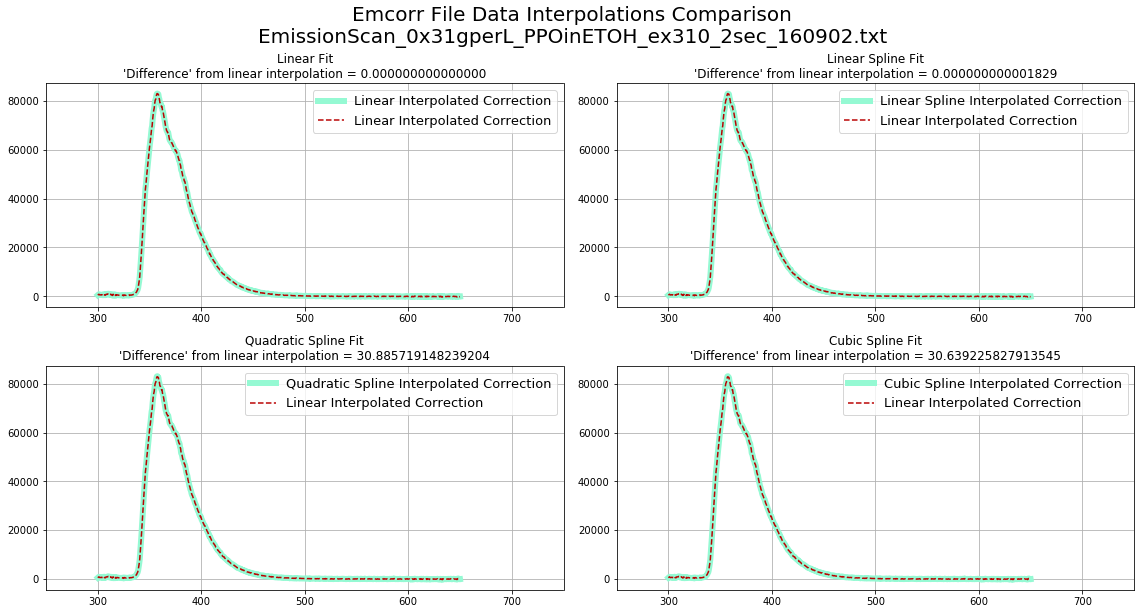

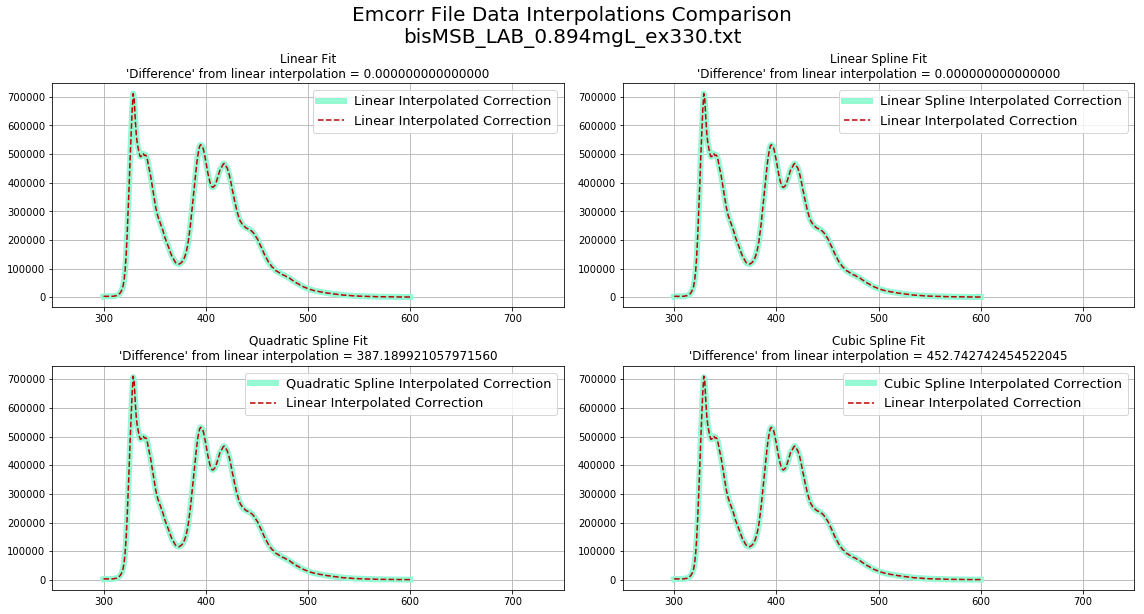

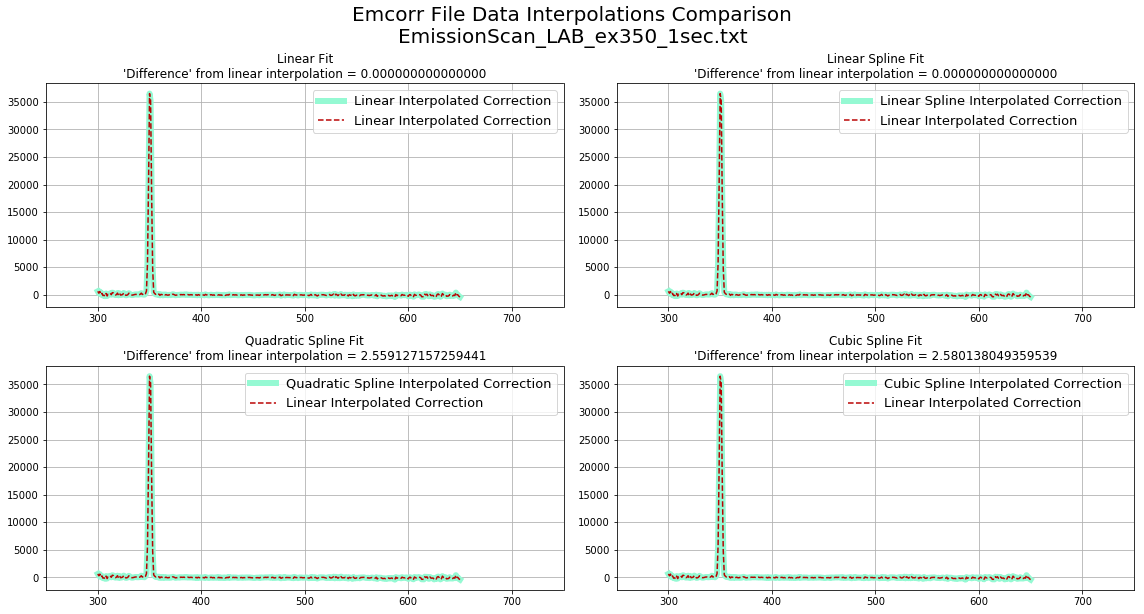

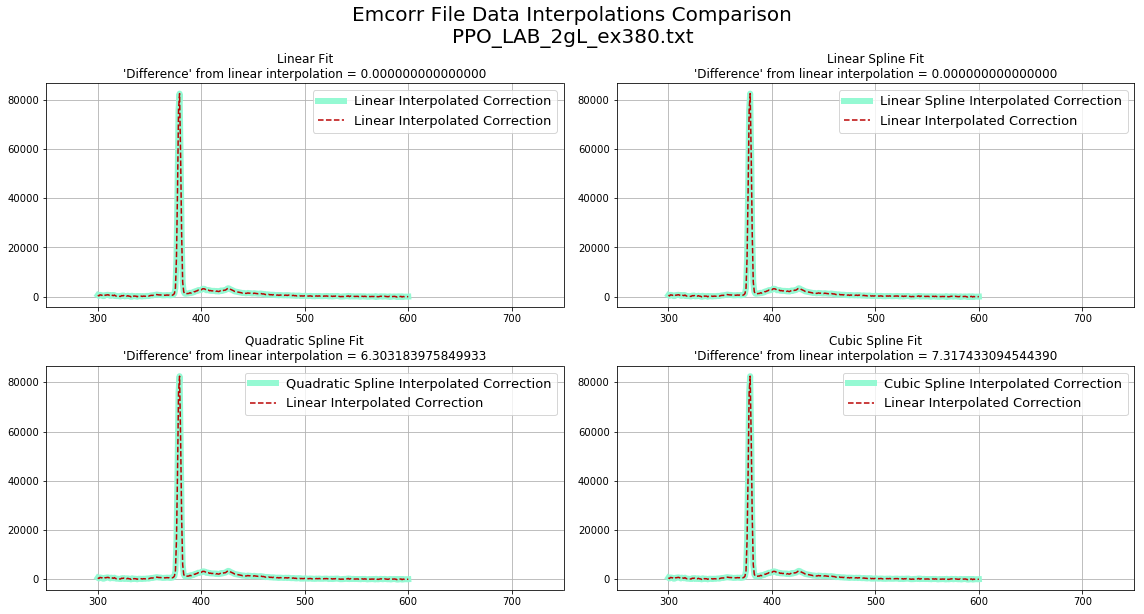

In [8]:
step  = 0.5
for data in interp_tests:
    fig = plt.figure(figsize = (16,8))
    fig.suptitle("Emcorr File Data Interpolations Comparison\n"+
                 data.file_path.split('/')[-1], y = 1.06, fontsize  = 20)
    for i in range(4):
        ax = fig.add_subplot(2,2,i+1)

        corrections = PTICorr.get_corrections(data, diode = False, excorr = False, em_interp_method = interpolations[i])
        lin_correction = PTICorr.get_corrections(data, diode = False, excorr = False, em_interp_method = 'linear')
        
        corrected = np.multiply(data.raw_data, corrections)
        lin_corrected = np.multiply(data.raw_data, lin_correction)

        mean_square_diff_from_lin = np.sqrt(np.mean(np.square(np.diff(lin_corrected  - corrected))))

        ax.plot(data.wavelengths, corrected, color = "#95f9d3", ls = '-', lw = 6)
        ax.plot(data.wavelengths, lin_corrected, color = "#ba0303", ls = '--')
        

        ax.set_xlim([250,750])
        ax.set_title(interp_titles[i] + " Fit\n" + 
                     "'Difference' from linear interpolation = %.15f" %mean_square_diff_from_lin)
        ax.legend(["%s Interpolated Correction"%interp_titles[i], "Linear Interpolated Correction"], fontsize = 13)
        ax.grid()
#         ax.text(0.01, 0.60, ,
#                 transform=ax.transAxes,fontsize = 14)
    
    plt.tight_layout()
    plt.show()

# Total LUT Corrections
## Cubic Interpolation for 0.5 nm Steps

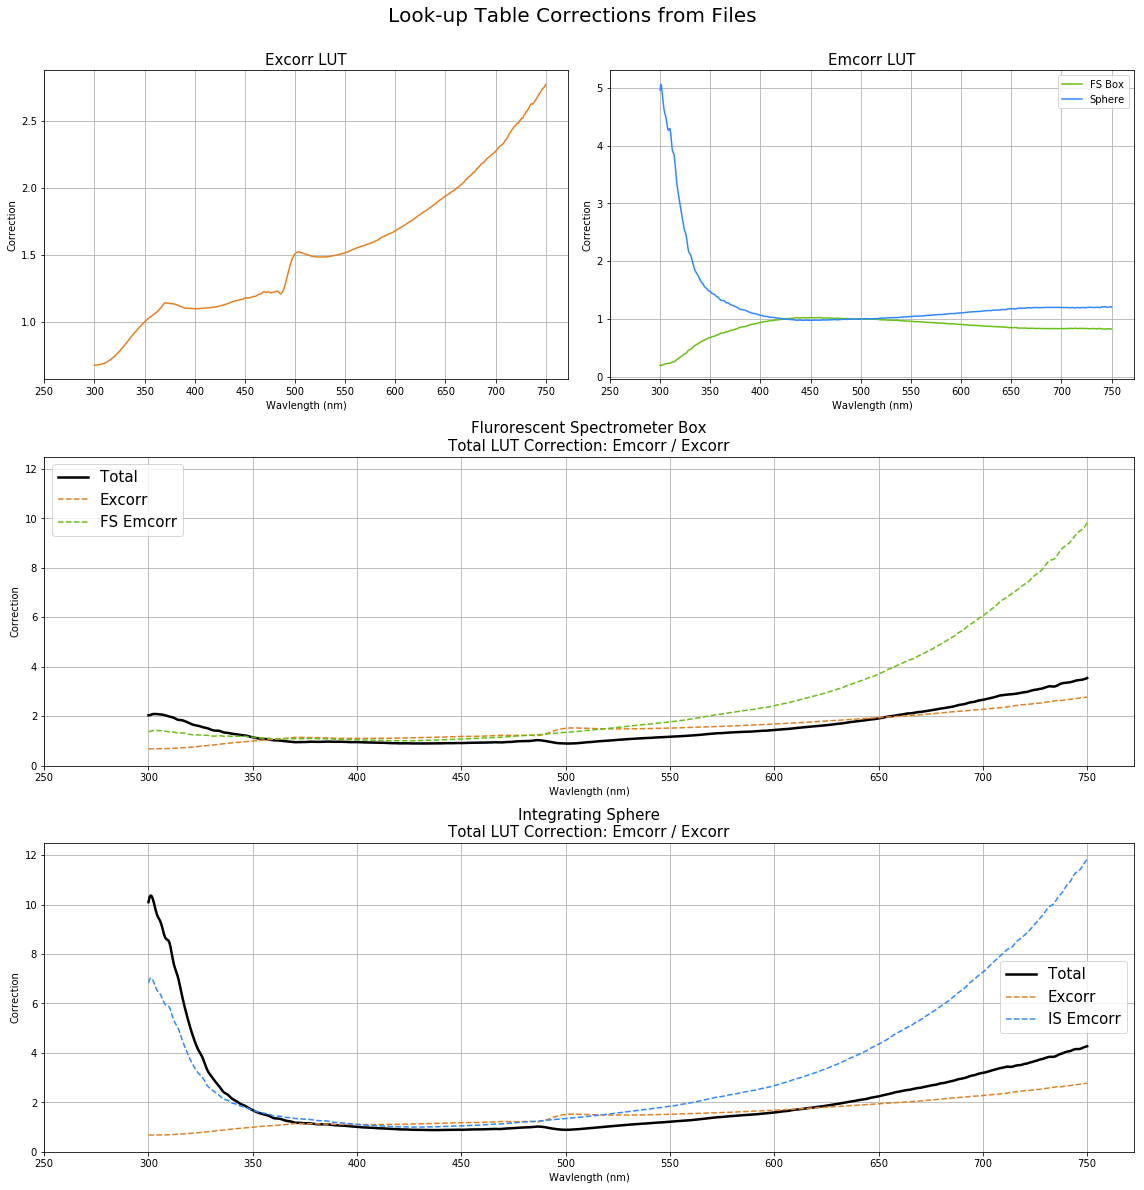

In [42]:
fig = plt.figure(figsize = (16,16))
fig.suptitle("Look-up Table Corrections from Files", y = 1.03, fontsize  = 20)
ax1 = plt.subplot2grid((3,2), (0,0))
ax2 = plt.subplot2grid((3,2), (0,1))
ax3 = plt.subplot2grid((3,2), (1,0), colspan = 2)
ax4 = plt.subplot2grid((3,2), (2,0), colspan = 2)

xvals = np.arange(300, 750+0.5, 0.5)
excorr = interp1d(excorr_wavelengths, file_excorr, 'cubic')(xvals)
FS_emcorr = interp1d(FS_emcorr_wavelengths, FS_file_emcorr, 'cubic')(xvals)
IS_emcorr = interp1d(IS_emcorr_wavelengths, IS_file_emcorr, 'cubic')(xvals)

ax1.plot(xvals, excorr,'#e67e22')
ax1.set_title("Excorr LUT", fontsize = 15)

ax2.plot(xvals, FS_emcorr, '#68bf16')
ax2.plot(xvals, IS_emcorr, '#3087ff')
ax2.set_title("Emcorr LUT", fontsize = 15)
ax2.legend(["FS Box", "Sphere"])

ax3.plot(xvals, FS_emcorr/excorr, 'k', lw = 2.5)
ax3.plot(xvals, excorr, color = '#e67e22', linestyle='dashed')
ax3.plot(xvals, FS_emcorr,color = '#68bf16', linestyle='dashed')
ax3.set_title("Flurorescent Spectrometer Box\nTotal LUT Correction: Emcorr / Excorr", fontsize = 15)
ax3.legend(["Total", "Excorr", "FS Emcorr"], fontsize  = 15)
ax3.set_ylim([0,12.5])

ax4.plot(xvals, IS_emcorr/excorr, 'k', lw = 2.5)
ax4.plot(xvals, excorr, color = '#e67e22', linestyle='dashed')
ax4.plot(xvals, IS_emcorr,color = '#3087ff', linestyle='dashed')
ax4.set_title("Integrating Sphere\nTotal LUT Correction: Emcorr / Excorr", fontsize = 15)
ax4.legend(["Total", "Excorr", "IS Emcorr"], fontsize  = 15)
ax4.set_ylim([0,12.5])

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid()
    ax.set_xlabel("Wavlength (nm)")
    ax.set_ylabel("Correction")
    ax.set_xticks(np.arange(250, 800, 50))

plt.tight_layout()
plt.show()


### Helper functions for applying and unapplying Felix GX corrections

### Data for the Next Two Analyses

In [3]:
paths = ["Henry/Sphere/PPO_ETOH/EmissionScan_ETOH_ex310_2sec_160830.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_ETOH_ex320_2sec_160830.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_ETOH_ex330_2sec_160830.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_ETOH_ex340_2sec_160830.txt",
         
         "Henry/Sphere/PPO_ETOH/EmissionScan_0x31gperL_PPOinETOH_ex310_2sec_160831.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_0x31gperL_PPOinETOH_ex320_2sec_160831.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_0x31gperL_PPOinETOH_ex330_2sec_160831.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_0x31gperL_PPOinETOH_ex340_2sec_160831.txt",
         
         "Henry/Sphere/PPO_ETOH/EmissionScan_3x14gperL_PPOinETOH_ex310_2sec_160831.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_3x14gperL_PPOinETOH_ex320_2sec_160831.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_3x14gperL_PPOinETOH_ex330_2sec_160831.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_3x14gperL_PPOinETOH_ex335_2sec_160901.txt",
         "Henry/Sphere/PPO_ETOH/EmissionScan_3x14gperL_PPOinETOH_ex340_2sec_160831.txt",
         
         "Henry/Sphere/bisMSB_LAB/EmissionScan_LAB_ex350_2sec_160823.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_LAB_ex360_2sec_160823.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_LAB_ex370_2sec_160823.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_LAB_ex380_2sec_160823.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_LAB_ex410_2sec_160823.txt",
        
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex350_2sec_160824.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex360_2sec_160824.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex370_2sec_160824.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex380_2sec_160824.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex390_2sec_160824.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex400_2sec_160824.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex410_2sec_160824.txt",
         
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex310_2sec_160829.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex320_2sec_160829.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex330_2sec_160829.txt",
         "Henry/Sphere/bisMSB_LAB/EmissionScan_bisMSBinLAB_4.47mgL_ex340_2sec_160829.txt",
         "Henry/Emission/bisMSBlab/bisMSB_LAB_0.894mgL_ex400_20160829.txt",
         "Henry/Emission/bisMSBlab/bisMSB_LAB_0.894mgL_ex410_20160829.txt",
         
         "Henry/Emission/PPOetoh/Sept/EmissionScan_0x31gperL_PPOinETOH_ex310_2sec_160902.txt",
         "Henry/Emission/PPOetoh/Sept/EmissionScan_0x31gperL_PPOinETOH_ex320_2sec_160902.txt",
         "Henry/Emission/PPOetoh/Sept/EmissionScan_0x31gperL_PPOinETOH_ex330_2sec_160902.txt",
         "Henry/Emission/PPOetoh/Sept/EmissionScan_0x31gperL_PPOinETOH_ex340_2sec_160902.txt",
         
         "Henry/Emission/PPOetoh/Sept/EmissionScan_3x14gperL_PPOinETOH_ex310_2sec_160901.txt",
         "Henry/Emission/PPOetoh/Sept/EmissionScan_3x14gperL_PPOinETOH_ex320_2sec_160901.txt",
         "Henry/Emission/PPOetoh/Sept/EmissionScan_3x14gperL_PPOinETOH_ex330_2sec_160901.txt",
         "Henry/Emission/PPOetoh/Sept/EmissionScan_3x14gperL_PPOinETOH_ex335_2sec_160901.txt",
         "Henry/Emission/PPOetoh/Sept/EmissionScan_3x14gperL_PPOinETOH_ex340_2sec_160901.txt",
         
         
         "Henry/Emission/bisMSBlab/bisMSB_LAB_0.894mgL_ex330.txt",
         "Henry/Emission/bisMSBlab/bisMSB_LAB_0.894mgL_ex337.txt",
         "Henry/Emission/bisMSBlab/bisMSB_LAB_0.894mgL_ex340.txt",
         "Henry/Emission/bisMSBlab/bisMSB_LAB_0.894mgL_ex350.txt",
         "Henry/Emission/bisMSBlab/bisMSB_LAB_0.894mgL_ex360.txt",

         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_1.26mgL_ex320.txt",
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_1.26mgL_ex325.txt",
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_1.26mgL_ex328.txt",
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_1.26mgL_ex330.txt",
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_1.26mgL_ex334.txt",
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_1.26mgL_ex337.txt",
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_1.26mgL_ex340.txt",
         
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_3.141gL_ex330.txt",
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_3.141gL_ex337.txt",
         "Henry/Emission/PPOetoh/Aug4/PPO_etoh_3.141gL_ex340.txt",
         
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex310.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex320.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex330.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex337.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex340.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex350.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex360.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex370.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex380.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex390.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_0.02gL_ex400.txt",
         
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_1.33mgL_ex325.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_1.33mgL_ex330.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_1.33mgL_ex332.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_1.33mgL_ex334.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_1.33mgL_ex337.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_1.33mgL_ex340.txt",
         
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex250.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex260.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex270.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex280.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex290.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex300.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex310.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex320.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex330.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex337.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex340.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex350.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex360.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex370.txt",
         "Henry/Emission/PPOlab/Aug4/PPO_LAB_2gL_ex380.txt"
        ]

# emcorrs =[False, False, False, False,
#           False, False, False, False, 
#           False, False, False, False, False,
#           False, False, False, False, False,
#           False, False, False, False, False, False, False,
#           False, False, False, False, False, False,
#           False, False, False, False,
#           False, False, False, False, False,
          
#           True, True, True, True,
#           True, True, True, True, True, True, True,
#           True, True, True,
#           True, True, True, True, True, True, True, True, True, True, True,
#           True, True, True, True, True, True,
#           True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True
#          ]
ex_waves = list()
for path in paths:
    ex_waves.append(PTIData(path).ex_range[0])

ex_ranges = list()
for wave in ex_waves:
    ex_ranges.append([wave - 10, wave + 10])
    
em_ranges = list()
for wave in ex_waves:
    em_ranges.append([wave + 10, 650])

# ex_ranges = [[300,320],[310,330],[320,340],[330,350],
#              [300,320],[310,330],[320,340],[330,350],
#              [300,320],[310,330],[320,340],[325,345],[330,350],
#              [340,360],[350,370],[360,380],[370,390],[400,420],
#              [340,360],[350,370],[360,380],[370,390],[380,400],[390,410],[400,420]
#             ]

# em_ranges = [[320,650],[330,650],[340,650],[350,650],
#              [320,650],[330,650],[340,650],[335,650],[350,650],
#              [320,650],[330,650],[340,650],[350,650],
#              [360,650],[370,650],[380,650],[390,650],[420,650],
#              [360,650],[370,650],[380,650],[390,650],[400,650],[410, 650],[420,650]
#             ]

# Diode Correction Analysis

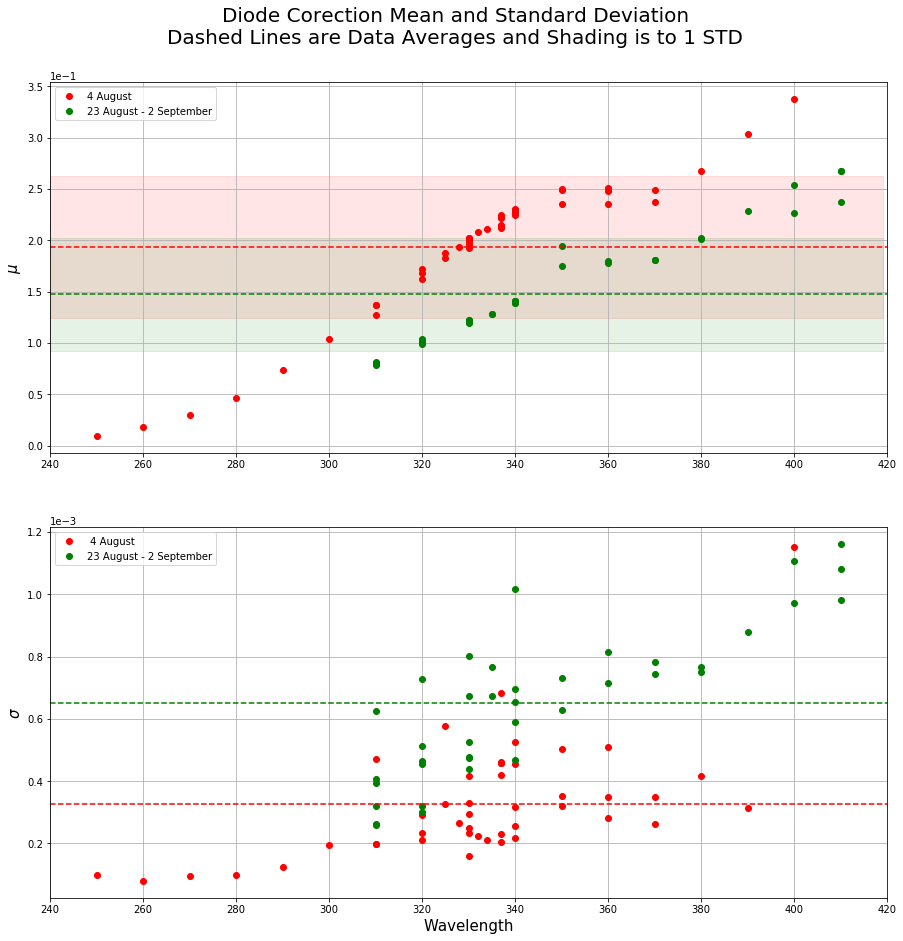

In [8]:
late_aug_diode_means = list()
late_aug_diode_stds = list()
late_aug_start_index = 0
late_aug_end_index   = 39
late_aug_ex_waves = list()

early_aug_diode_means = list()
early_aug_diode_stds = list()
early_aug_start_index = 40
early_aug_end_index   = 86
early_aug_ex_waves = list()

for i in range(late_aug_start_index, late_aug_end_index):
    data = PTIData(paths[i])
    late_aug_diode_means.append(np.mean(data.diode))
    late_aug_diode_stds.append(np.std(data.diode))
    late_aug_ex_waves.append(ex_waves[i])
    
for i in range(early_aug_start_index, early_aug_end_index):
    data = PTIData(paths[i])
    early_aug_diode_means.append(np.mean(data.diode))
    early_aug_diode_stds.append(np.std(data.diode))
    early_aug_ex_waves.append(ex_waves[i])
    
mean_of_early_aug_means = np.mean(early_aug_diode_means)
mean_of_late_aug_means = np.mean(late_aug_diode_means)
mean_of_total_means = np.mean(early_aug_diode_means + late_aug_diode_means)
std_of_early_aug_means = np.std(early_aug_diode_means)
std_of_late_aug_means = np.std(late_aug_diode_means)
std_of_total_means = np.std(early_aug_diode_means + late_aug_diode_means)

mean_of_early_aug_stds = np.mean(early_aug_diode_stds)
mean_of_late_aug_stds = np.mean(late_aug_diode_stds)

fig = plt.figure(figsize=(15,15))
fig.suptitle("Diode Corection Mean and Standard Deviation\n"+
             "Dashed Lines are Data Averages and Shading is to 1 STD", y = .95, fontsize = 20)

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2,sharex = ax1)

# Plotting the Mean Diode Correction Data
ax1.plot(early_aug_ex_waves, early_aug_diode_means, color = 'r', marker = 'o', ls = "None")
ax1.plot(late_aug_ex_waves, late_aug_diode_means, color = 'g', marker = 'o', ls = "None")

ax1.axhline(y=mean_of_early_aug_means, color='r', linestyle='--')
ax1.fill_between(range(240, 420), y1 = mean_of_early_aug_means + std_of_early_aug_means, 
                          y2 = mean_of_early_aug_means - std_of_early_aug_means, 
                 color = 'r', alpha = 0.1)

ax1.axhline(y=mean_of_late_aug_means, color='g', linestyle='--')
ax1.fill_between(range(240, 420), y1 = mean_of_late_aug_means + std_of_late_aug_means, 
                          y2 = mean_of_late_aug_means - std_of_late_aug_means, 
                 color = 'g', alpha = 0.1)

ax1.set_xlim([240, 420])
ax1.legend(["4 August", "23 August - 2 September"])
ax1.set_ylabel("$\mu$", fontsize = 15)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.grid()

# Plotting the STD of the Diode Correction Data
ax2.plot(early_aug_ex_waves, early_aug_diode_stds, color = 'r', marker = 'o', ls = "None")
ax2.plot(late_aug_ex_waves, late_aug_diode_stds, color = 'g', marker = 'o', ls = "None")
ax2.axhline(y=mean_of_early_aug_stds, color='r', linestyle='--')
ax2.axhline(y=mean_of_late_aug_stds, color='g', linestyle='--')

ax2.legend([" 4 August", "23 August - 2 September"])
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax2.set_xlabel("Wavelength", fontsize = 15)
ax2.set_ylabel(r'$\sigma$', fontsize = 15)
ax2.grid()

plt.show()

The emission spectrum for a Xenon arclength for comparison, taken from the PTI Website. The relevant portion of the graph is the section between 250 and 450 nm. 

In [9]:
Image(url= "http://www.obbcorp.com/images/KiloArc/xe.gif", width=2*431, height=2*292)

# Removing Diode Corrections Only

In [10]:
for i in range(len(paths)):
    test = PTIData(paths[i])
    decorrected = PTICorr.decorrect_cor_to_raw(test, undo_ex_LUT = False, undo_em_LUT= False)
    diff = decorrected.raw_data - test.raw_data
    ratio = decorrected.raw_data / test.raw_data
    
    ex_where = np.where((test.wavelengths >= ex_ranges[i][0]) &
                        (test.wavelengths <= ex_ranges[i][1]))
    
    em_where = np.where((test.wavelengths >= em_ranges[i][0]) &
                        (test.wavelengths <= em_ranges[i][1]))
        
    
    fig_i = plt.figure(figsize = (16,25))
    excorr_ax = plt.subplot2grid((6,2),(0,0), colspan=2)
    corr_ax = plt.subplot2grid((6,2),(1,0), colspan=2)
    ax =  plt.subplot2grid((6,2),(2,0), colspan=2)
    ax1 = plt.subplot2grid((6,2),(3,0))
    ax2 = plt.subplot2grid((6,2),(3,1))
    ax3 = plt.subplot2grid((6,2),(4,0), colspan=2)
    ax4 = plt.subplot2grid((6,2),(5,0), colspan=2)
    
    fig_i.suptitle("Spectra of Raw Data vs Un-corrected Data\n"+ paths[i], fontsize = 20)
                               
    excorr_ax.plot(test.wavelengths, test.diode,"#433e90")
    excorr_ax.set_title("Diode Correction", fontsize = 15)
    
    corr_ax.plot(test.wavelengths, PTICorr.get_corrections(test, excorr = False, emcorr = False), "#433e90")
    corr_ax.set_title("Total Correction", fontsize = 15)                        
    
    ax.plot(test.wavelengths, decorrected.raw_data,"#52c6c3")
    ax.plot(test.wavelengths, test.raw_data,"#696969")
    ax.legend(["De-corrected", "Raw"])
    
    ax1.plot(test.wavelengths[ex_where], decorrected.raw_data[ex_where],"#52c6c3")
    ax1.plot(test.wavelengths[ex_where], test.raw_data[ex_where],"#696969")
    ax1.set_title("Absorption Range", fontsize = 15)
    ax1.legend(["De-corrected", "Raw"])
    
    ax2.plot(test.wavelengths[em_where], decorrected.cor_data[em_where],"#52c6c3")
    ax2.plot(test.wavelengths[em_where], test.raw_data[em_where],"#696969")
    ax2.set_title("Emission Range", fontsize = 15)
    ax2.legend(["De-corrected", "Raw"])
    
    ax3.plot(test.wavelengths, diff,"k")
    ax3.set_title("Difference: Decorrected - Raw", fontsize = 15)
                
    ax4.plot(test.wavelengths, ratio,"#433e90")
    ax4.set_title("Ratio: Decorrected / Raw", fontsize = 15)
    ax4.set_ylim([0,3])
    
    for axis in [ax, ax1, ax2, ax3,ax4,excorr_ax,corr_ax]:
        axis.grid()
#         axis.set_xlim([test.wavelengths[0], test.wavelengths[-1]])
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
#     plt.subplots_adjust(top=0.85)
    fname = paths[i][:-4].split("/")[-1]
    plt.savefig("Decorrected_2016_Plots/only_diode_removed/" + "%02d" %(i) + fname + ".png")
    plt.close(fig_i)

In [8]:
FS_emcorr = range(40, 64+1) +  range(66,86+1)
mean_diodes= list()
mean_ratios= list()

for i in range(len(paths)):
    test = PTIData(paths[i])
    FS = i in FS_emcorr
    decorrected = PTICorr.decorrect_cor_to_raw(test, undo_diode = True, undo_ex_LUT = True, undo_em_LUT = FS, FS = FS)
    
    diff = decorrected.raw_data - test.raw_data
    ratio = decorrected.raw_data / test.raw_data
    
    mean_diodes.append(np.mean(test.diode))
    mean_ratios.append(np.mean(ratio))
        
    ex_where = np.where((test.wavelengths >= ex_ranges[i][0]) &
                        (test.wavelengths <= ex_ranges[i][1]))
    
    em_where = np.where((test.wavelengths >= em_ranges[i][0]) &
                        (test.wavelengths <= em_ranges[i][1]))
        
    
    fig_i = plt.figure(figsize = (16,25))
    excorr_ax = plt.subplot2grid((6,2),(0,0), colspan=2)
    corr_ax = plt.subplot2grid((6,2),(1,0), colspan=2)
    ax =  plt.subplot2grid((6,2),(2,0), colspan=2)
    ax1 = plt.subplot2grid((6,2),(3,0))
    ax2 = plt.subplot2grid((6,2),(3,1))
    ax3 = plt.subplot2grid((6,2),(4,0), colspan=2)
    ax4 = plt.subplot2grid((6,2),(5,0), colspan=2)
    
    fig_i.suptitle("Spectra of Raw Data vs Un-corrected Data\n"+ paths[i], fontsize = 20)
                               
    excorr_ax.plot(test.wavelengths, test.diode,"#433e90")
    excorr_ax.set_title("Diode Correction", fontsize = 15)
    
    corr_ax.plot(test.wavelengths, PTICorr.get_corrections(test, diode = True, excorr = True, emcorr = FS, FS = FS), "#433e90")
    corr_ax.set_title("Total Correction", fontsize = 15)                        
    
    ax.plot(test.wavelengths, decorrected.raw_data,"#52c6c3")
    ax.plot(test.wavelengths, test.raw_data,"#696969")
    ax.legend(["De-corrected", "Raw"])
    
    ax1.plot(test.wavelengths[ex_where], decorrected.raw_data[ex_where],"#52c6c3")
    ax1.plot(test.wavelengths[ex_where], test.raw_data[ex_where],"#696969")
    ax1.set_title("Absorption Range", fontsize = 15)
    ax1.legend(["De-corrected", "Raw"])
    
    ax2.plot(test.wavelengths[em_where], decorrected.raw_data[em_where],"#52c6c3")
    ax2.plot(test.wavelengths[em_where], test.raw_data[em_where],"#696969")
    ax2.set_title("Emission Range", fontsize = 15)
    ax2.legend(["De-corrected", "Raw"])
    
    ax3.plot(test.wavelengths, diff,"k")
    ax3.set_title("Difference: Decorrected - Raw", fontsize = 15)
                
    ax4.plot(test.wavelengths, ratio,"#433e90")
    ax4.set_title("Ratio: Decorrected / Raw", fontsize = 15)
    ax4.set_ylim([0,3])
    
    for axis in [ax, ax1, ax2, ax3,ax4,excorr_ax,corr_ax]:
        axis.grid()
#         axis.set_xlim([test.wavelengths[0], test.wavelengths[-1]])
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
#     plt.subplots_adjust(top=0.85)
    fname = paths[i][:-4].split("/")[-1]
    plt.savefig("Decorrected_2016_Plots/all_removed/" + "%02d" %(i) + fname + ".png")
    plt.close(fig_i)

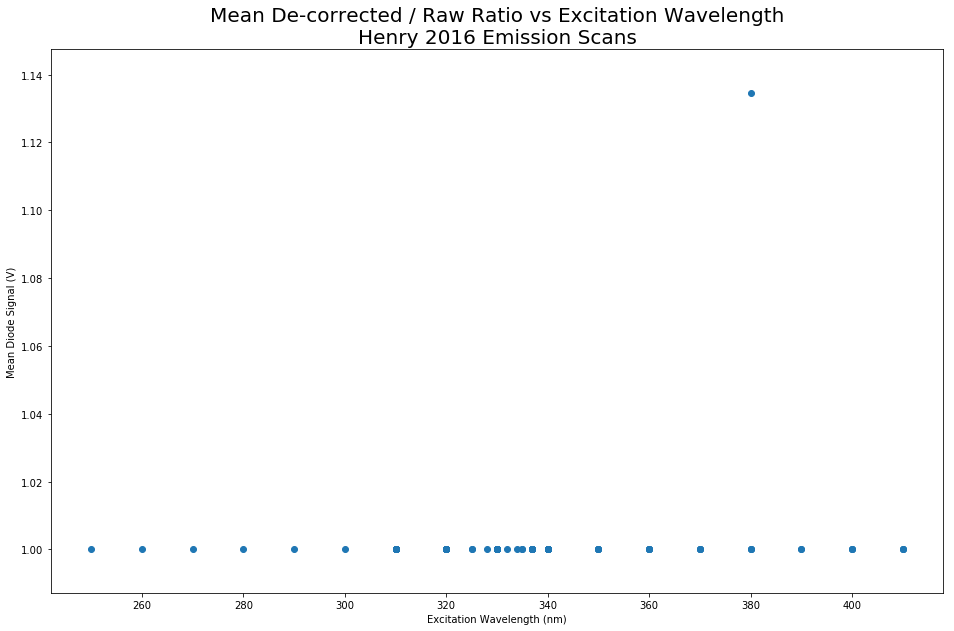

In [9]:
plt.figure(figsize = (16,10))
plt.title("Mean De-corrected / Raw Ratio vs Excitation Wavelength\n" + 
          "Henry 2016 Emission Scans", fontsize = 20)
plt.xlabel("Excitation Wavelength (nm)")
plt.ylabel("Mean Diode Signal (V)")
plt.scatter(ex_waves, mean_ratios)
plt.show()